# Data Science Research : The PAMAP2 Physical Activity Monitoring Dataset

# Introduction

In this report, we strive to devise software and hardware that can determine the amount of physical activity a person performs and provide insights gleaned from the data.

The PAMAP2 Physical Activity Monitoring Dataset contains the data carried out on 9 subjects which include an adult group of 8 males and 1 female and their corresponding readings were taken by wearing three different Inertial Measurements Units and Heart Rate monitor. There were 18 different physical activities(running,rope jumping, lying etc) performed on each subject, and their hand, chest, and ankle readings were recorded. The readings of individual subjects are stored in .dat files. This text file contains 54 different attributes (including timestamps, activity IDs, heart rates, and IMU sensory data). Analyses are carried out in various stages, such as exploratory data analysis, hypothesis testing, and modeling.


# Content

### Preparatory Task
- Importing libraries

### <b>Data Cleaning:</b>

Functions involved:-
- Cleaning the data by removing the null values and the variables that are not used in this analysis using data_cleaning()
- Sub-Function :fill_null_heartrate() :- replace Null values of heart rate column
               
### <b>Exploratory Data Analysis:</b>

- Generation of test and train data
- Activity time analysis by subjectID
- Analysis on activity by heartrate
- Analysis on activity by calorie burnt
- Analysis on activity by heart, chest and ankle temperature
- Correlation analysis
    
### <b>Hypothesis Testing:</b>

- Hypothesis stated : A hypothesis of dependency between activity and human heartrate fluctiations.
- Perform z-test
- Result based on z-test

### <b>Modelling :</b>

- Polynomial Regression
- Random Forest algorithm

#  Preparatory Task

In this process, the libraries that are needed are imported, as well as the files that need to be loaded.

In [241]:
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import math
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split

In [146]:
subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

#weight of the subjects
subject_weights={1:83,2:78,3:92,4:95,5:73,6:69,7:86,8:87,9:65}

#the metabolic equivalent of the activity, which is a measure of the intensity of the activity
MET_values = {1: 1,
              2: 1.8,
              3: 1.8,
              4: 3.5,
              5: 7.5,
              6: 4,
              7: 5.5,
              12:8,
              13: 3,
              16: 3.5,
              17: 2.3,
              24: 9}

In [147]:
List_of_Subjects=['Dataset/Protocol/subject101.dat',
                  'Dataset/Protocol/subject102.dat',
                  'Dataset/Protocol/subject103.dat',
                  'Dataset/Protocol/subject104.dat',
                  'Dataset/Protocol/subject105.dat',
                  'Dataset/Protocol/subject106.dat',
                  'Dataset/Protocol/subject107.dat',
                  'Dataset/Protocol/subject108.dat',
                  'Dataset/Protocol/subject109.dat']

IMUhand = ['Temperature_hand', 
           '3D_hand_Accl_16_1', '3D_hand_Accl_16_2', '3D_hand_Accl_16_3', 
           '3D_hand_Accl_6_1', '3D_hand_Accl_6_2', '3D_hand_Accl_6_3', 
           '3D_handGyro_1', '3D_handGyro_2', '3D_handGyro_3', 
           '3D_handmagneto_1', '3D_handmagneto_2', '3D_handmagneto_3',
           'Orientation_hand_1', 'Orientation_hand_2', 'Orientation_hand_3', 'Orientation_hand_4']

IMUchest = ['Temperature_chest', 
           '3D_chest_Accl_16_1', '3D_chest_Accl_16_2', '3D_chest_Accl_16_3', 
           '3D_chest_Accl_6_1', '3D_chest_Accl_6_2', '3D_chest_Accl_6_3', 
           '3D_chestGyro_1', '3D_chestGyro_2', '3D_chestGyro_3', 
           '3D_chestmagneto_1', '3D_chestmagneto_2', '3D_chestmagneto_3',
           'Orientation_chest_1', 'Orientation_chest_2', 'Orientation_chest_3', 'Orientation_chest_4']

IMUankle = ['Temperature_ankle', 
           '3D_ankle_Accl_16_1', '3D_ankle_Accl_16_2', '3D_ankle_Accl_16_3', 
           '3D_ankle_Accl_6_1', '3D_ankle_Accl_6_2', '3D_ankle_Accl_6_3', 
           '3D_ankleGyro_1', '3D_ankleGyro_2', '3D_ankleGyro_3', 
           '3D_anklemagneto_1', '3D_anklemagneto_2', '3D_anklemagneto_3',
           'Orientation_ankle_1', 'Orientation_ankle_2', 'Orientation_ankle_3', 'Orientation_ankle_4']

columns=["timestamp", "activityID","heartrate"]+IMUhand+IMUchest+IMUankle

len(columns)

54

To read and load the <b>.dat</b> file into a single dataframe, a list of subjects (List_of_Subjects) is created. We create a dictionary activityIDdict that maps each activityId to its associated activity name for later processing steps. Following that, a list of hand, chest, and ankle inertial measurement units (IMU) is created so that column names can be assigned to the obtained dataframe. In total, 54 IMU will be present in the dataframe, which means 54 columns.

In [148]:
def create_dataframe(list_of_files):
    datafr = pd.DataFrame()
    for file in list_of_files:
        #procData = pd.read_table(file, header=None, sep='\s+')
        df = pd.read_csv(file,sep='\s+|\s+',engine='python')
        strfile=file[17:27]+'.csv'
        df.to_csv(strfile, index=None)
        phydf=pd.read_csv(strfile)
        phydf.columns = columns
        phydf['subject_id'] = int(file[-5])
        #dataCollection = dataCollection.append(procData, ignore_index=True)
        datafr=pd.concat([datafr, phydf], ignore_index=True)
    return datafr

datafr=create_dataframe(List_of_Subjects)
#dataCollection.reset_index(drop=True, inplace=True)
datafr.reset_index(drop=True, inplace=True)
#dataCollection.head()
datafr.head(10)

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,Orientation_ankle_1,Orientation_ankle_2,Orientation_ankle_3,Orientation_ankle_4,subject_id
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,1
5,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0,1
6,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0,1
7,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0,1
8,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0,1
9,8.48,0,104.0,30.0,2.29745,8.90450,3.46984,2.39736,8.94335,3.53551,...,0.002283,0.020352,-61.5302,-38.7240,-58.3860,1.0,0.0,0.0,0.0,1


# Data Cleaning

The data_cleaning() takes <b>datafr</b>(dataframe created at the begining of the process) as input and <b>phydata</b>(dataframe after cleaning) is obtained as its output. Here in data cleaning we will be focusing on four steps:

- <b>Dropping the irrelevant columns</b>: Going further, I won't require any of the orientation columns for analysis so I will           remove those columns.


- <b>Removing the rows with activityID=0</b>: For further analysis I won't be considering the activities with activityID = 0 as the      subjects are not doing any task.<br>


- <b>Removal of null values</b>: Here to remove all the null values, I will use interpolate function. Since in  the dataset records the reading is taken every millisecond and the various IMU reading won't change drastically so I will assume the null value will be similar to the above row.<br>For all columns, except heart rate, null values are removed using the interpolate() method. Heartrate has been replaced with the mean heart rate of each activity group in place of null values. Even after applying interpolation() to heartrate, there are NaN values that can either be filled with an assumed value, but instead I have replaced them with 100.<br>


- <b>Converting values into numeric value</b>: Since our data is all about different readings which are recorded in number type I will be converting all the values which are in non numeric format into numeric type


In [149]:
def fill_null_heartrate(datafr):
    #funtion : fill_null_heartrate : replace the null values in heartrate column with 100
    #parameters : datafr : dataframe
    
    act_name=list(set(datafr['activityID'].values))
    datedd=datafr
    for act in act_name:
        
        datedd.loc[datedd['activityID']== act, ['heartrate']]=datedd.loc[datedd['activityID']== act, ['heartrate']].fillna(100)
    return datedd

In [150]:
def data_cleaning(dataCollection):
    
        # removal of orientation columns as they are not needed
        dataCollection = dataCollection.drop(['Orientation_hand_1', 'Orientation_hand_2', 'Orientation_hand_3', 'Orientation_hand_4',
                                             'Orientation_chest_1', 'Orientation_chest_2', 'Orientation_chest_3', 'Orientation_chest_4',
                                             'Orientation_ankle_1', 'Orientation_ankle_2', 'Orientation_ankle_3', 'Orientation_ankle_4'],
                                             axis = 1)  
        
        #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) 
        
        
        #removal of any remaining NaN value cells by constructing new data points in known set of data points
        dataCollection = dataCollection.interpolate() 
        
        #call fill_null_heartrate()
        dataCollection=fill_null_heartrate(dataCollection)
        
        #removal of non numeric data in cells
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') 
        
        return dataCollection


In [151]:
phydata=data_cleaning(datafr)
phydata.reset_index(drop = True, inplace = True)
phydata

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
2927,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
2928,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2929,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
2930,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
2931,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872006,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
2872007,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
2872008,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
2872009,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


In [153]:
phydata.head()

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [154]:
phydata.isnull().sum()

timestamp             0
activityID            0
heartrate             0
Temperature_hand      0
3D_hand_Accl_16_1     0
3D_hand_Accl_16_2     0
3D_hand_Accl_16_3     0
3D_hand_Accl_6_1      0
3D_hand_Accl_6_2      0
3D_hand_Accl_6_3      0
3D_handGyro_1         0
3D_handGyro_2         0
3D_handGyro_3         0
3D_handmagneto_1      0
3D_handmagneto_2      0
3D_handmagneto_3      0
Temperature_chest     0
3D_chest_Accl_16_1    0
3D_chest_Accl_16_2    0
3D_chest_Accl_16_3    0
3D_chest_Accl_6_1     0
3D_chest_Accl_6_2     0
3D_chest_Accl_6_3     0
3D_chestGyro_1        0
3D_chestGyro_2        0
3D_chestGyro_3        0
3D_chestmagneto_1     0
3D_chestmagneto_2     0
3D_chestmagneto_3     0
Temperature_ankle     0
3D_ankle_Accl_16_1    0
3D_ankle_Accl_16_2    0
3D_ankle_Accl_16_3    0
3D_ankle_Accl_6_1     0
3D_ankle_Accl_6_2     0
3D_ankle_Accl_6_3     0
3D_ankleGyro_1        0
3D_ankleGyro_2        0
3D_ankleGyro_3        0
3D_anklemagneto_1     0
3D_anklemagneto_2     0
3D_anklemagneto_

The data cleaning phase is now complete. The final dataframe <b>"phydata"</b> contains all the information and is ready for the next phase "Exploratory data analysis".

# Exploratory Data Analysis

During this phase, all EDA analyses are conducted. The analysis is conducted using <b>'phydata'</b> as input and <b>'graphs based on the analysis'</b> are generated as output.


The process includes:-
- Generation of test and train data
- Activity time analysis by subjectID
- Analysis on activity by heartrate
- Analysis on activity by calorie burnt
- Analysis on activity by heart, chest and ankle temperature
- Correlation analysis

It is important to check if a dataframe is balanced before splitting it into a test and train set because unbalanced data can affect the performance of a machine learning model. If the data is unbalanced, meaning that one class is significantly more prevalent than the other class, the model may be biased towards the more prevalent class. This can lead to poor performance on the less prevalent class.

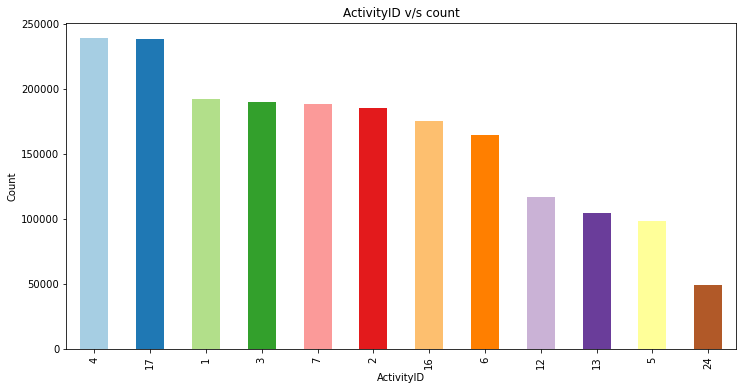

In [187]:
size = range(len(phydata))
phydata['activityID'].value_counts().plot(kind = "bar",figsize = (12,6),color=plt.cm.Paired(size))
plt.xlabel("ActivityID")
plt.ylabel("Count")
plt.title('ActivityID v/s count')
plt.show()

We can see from the bar graph that the dataframe is balanced, so we can split it into test and train sets.

### Generation of test and train data

The test and train data are generated by splitting the data frame in half, i.e. 0.5.

In [156]:
def splitting_train_test(dataframe,n=0.5):
    train_df = dataframe.sample(frac=n, random_state=1)
    test_df = dataframe.drop(train_df.index)
    return train_df,test_df

In [157]:
training_data,testing_data = splitting_train_test(phydata,0.5)

In [158]:
training_data.describe()

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
count,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,...,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000,971436.000000
mean,1703.994666,8.081953,107.445857,32.751715,-4.956991,3.579835,3.612234,-4.890270,3.570034,3.796905,...,9.370013,-0.046497,-2.176481,0.011323,-0.035935,0.007185,-31.582509,1.404674,17.253204,4.565264
std,1093.247832,6.174908,26.975255,1.793871,6.244104,6.881571,3.962008,6.249035,6.593962,3.946777,...,6.068911,7.187835,3.477410,1.124865,0.637566,2.009187,18.346495,21.685612,19.705747,2.332310
min,31.220000,1.000000,57.000000,24.875000,-145.367000,-104.301000,-101.452000,-61.214700,-61.841700,-61.934700,...,-61.142000,-61.903500,-62.203800,-13.592200,-7.324840,-12.977400,-172.624000,-137.908000,-102.716000,1.000000
25%,744.560000,3.000000,86.000000,31.687500,-8.970760,1.060202,1.171568,-8.866962,1.060518,1.373687,...,8.394965,-2.073703,-3.398802,-0.207035,-0.106357,-0.437332,-41.694300,-12.443825,3.813545,2.000000
50%,1478.680000,6.000000,104.000000,33.125000,-5.449225,3.525055,3.442250,-5.378790,3.566135,3.674970,...,9.549240,-0.223893,-1.992215,0.004692,-0.003908,-0.002289,-33.998050,0.779744,18.771850,5.000000
75%,2662.552500,13.000000,124.000000,34.062500,-0.964139,6.451445,6.533720,-0.909503,6.458100,6.785285,...,10.278000,1.920240,-0.595102,0.131925,0.116567,0.091502,-17.897800,17.840625,31.241150,7.000000
max,4245.680000,24.000000,202.000000,35.500000,62.859600,155.699000,157.760000,45.548400,62.259800,61.728000,...,61.969300,62.049000,55.553400,16.442700,13.588200,14.482700,91.551600,93.699200,139.787000,9.000000


In [159]:
training_data.sort_index()

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.974400,-57.750100,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.963200,-57.995700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942859,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,...,9.44267,-1.99702,-1.806020,-0.036682,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,9
1942861,95.00,24,162.0,25.125,5.07290,6.39761,5.59819,4.94094,6.45017,5.63737,...,9.44276,-2.13311,-1.775310,0.027636,-0.024815,-0.022575,-46.2808,-1.320750,0.254182,9
1942862,95.01,24,162.0,25.125,4.95472,6.28366,5.48134,4.93917,6.35946,5.51677,...,9.39788,-2.13306,-1.729670,-0.005801,-0.007817,0.009006,-45.9034,-1.211660,-0.028281,9
1942863,95.02,24,162.0,25.125,4.80517,6.32311,5.51746,4.89281,6.22387,5.51711,...,9.48793,-2.20869,-1.745040,-0.028744,-0.061156,0.033653,-46.0452,-0.690454,-0.313048,9


### Activity time analysis by subjectID

Let us consider the amount of time each subject spent performing different types of physical activity. As a result, the activityID is mapped with the activity's name to create a dataframe named <b>phydatacop</b>.

In [161]:
phydatacop=training_data.copy()
phydatacop.activityID=phydatacop.activityID.apply(lambda x:activityIDdict[x])
phydatacop

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
312921,767.77,standing,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,...,9.716540,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.87960,36.806500,2
141735,1926.37,ascending_stairs,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,...,11.137500,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.7218,33.83850,-6.571620,1
1191085,3749.31,rope_jumping,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-4.136650,-4.006830,2.162320,1.877290,-0.176273,-0.654045,-44.6465,-12.21680,0.272571,5
1206914,255.84,lying,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,-0.117976,-9.411680,-2.836260,-0.008012,0.002114,0.017758,-17.3221,26.44510,-4.782110,6
1710520,491.73,sitting,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,9.187270,2.903000,-2.153400,0.010209,0.011341,0.028921,-19.4371,15.82690,26.000300,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471794,3648.85,cycling,120.000000,29.7500,-6.10533,3.427980,7.365140,-6.577840,4.301450,9.142140,...,10.602400,-2.752050,-1.022720,0.154275,0.059888,0.106166,-41.1119,5.34881,8.881400,2
46078,498.44,sitting,92.000000,32.5625,-7.87425,4.095880,4.141940,-7.704180,4.138990,4.356700,...,9.135820,1.192120,-3.570340,0.063705,0.008307,0.002250,-85.4454,38.14700,16.401700,1
495388,3961.26,running,139.000000,28.8750,-5.33359,36.979800,-3.435980,-3.119450,34.862600,-2.873060,...,11.857500,5.583830,0.381641,-1.355570,1.238730,-3.278750,-51.4954,-5.78950,36.450200,2
1506095,783.52,ironing,74.000000,33.3750,2.11020,11.319200,-2.429680,2.211510,12.367400,-2.346000,...,9.890210,-0.561093,-2.660590,0.426933,-0.741163,0.191537,-33.2568,-1.96371,46.112500,7


Using a pie chart, we examine the time subjects spend on each activity (excluding the optional data given).

Time spend for each activity by subjects


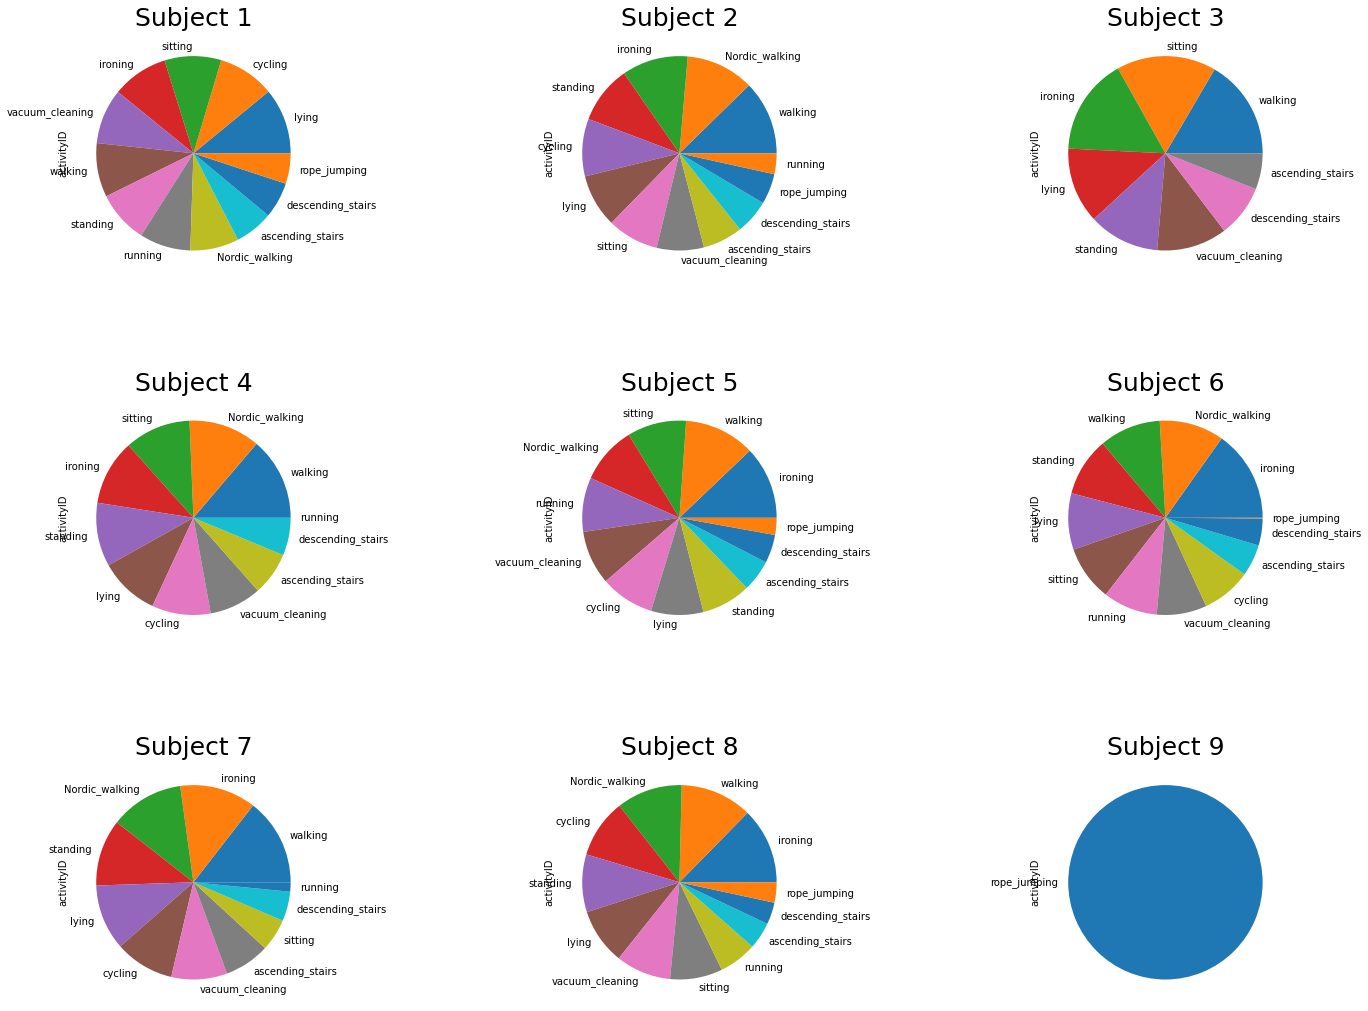

In [223]:
def plot(df, sub, ax):

    df.activityID.value_counts().plot(kind='pie', ax=ax)
    df.activityID.agg(['value_counts'])
    ax.set_title('Subject {}'.format(sub), fontsize=25)
    
# Add a title to the entire figure
print('Time spend for each activity by subjects')

# Create a figure with 3 rows and 3 columns of subplots, with a larger size
fig, ax = plt.subplots(3, 3, figsize=(9, 9))

# Iterate through the subject IDs
for i, sub in enumerate([1,2,3, 4,5,6,7,8,9]):
    # Plot the pie chart for the subject and assign it to the appropriate subplot
    plot(phydatacop[phydatacop['subject_id']==sub], sub, ax[i // 3][i % 3])



# Adjust the spacing between the subplots
plt.subplots_adjust(left=0, bottom=0.5, right=2, top=2, wspace=0.5, hspace=0.5)

# Show the plot
plt.show()

### Analysis on activity by heartrate

Let us consider now consider the average heartrate measured while performing various physical activities.

In [115]:
df_grouped=training_data.groupby(['activityID']).mean()
df_grouped=df_grouped.reset_index()
df_grouped

,activityID,timestamp,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
0,1,205.810018,75.545557,32.728505,3.679602,2.061675,6.367305,3.791752,2.032754,6.588179,...,0.543936,-6.226228,-3.316962,0.010893,-0.005854,0.006003,-17.937375,20.577229,0.134306,4.485731
1,2,506.308536,80.047179,33.258141,-1.389341,4.295544,5.173842,-1.262264,4.294076,5.383078,...,8.809982,-0.216851,-2.089557,0.006796,-0.005329,0.005010,-22.525800,2.503881,21.125203,4.306876
2,3,733.377930,88.536730,33.637740,-7.075932,3.223117,2.675270,-6.939606,3.266560,2.893323,...,9.380298,-0.741048,-1.643213,0.004367,-0.004551,0.004309,-22.656027,-0.594149,24.427203,4.593166
3,4,2429.595921,112.779310,32.303069,-10.107593,2.515623,1.922580,-10.100182,2.545913,2.092860,...,11.959444,0.632620,-2.693545,-0.005349,-0.113771,-0.000048,-36.985424,-0.592640,15.840951,4.623625
4,5,3445.280586,156.609147,30.819405,-6.504239,6.728369,0.287698,-6.624070,6.352816,0.388420,...,13.193339,2.880917,-3.189012,0.002644,-0.100271,-0.037299,-36.532773,-8.301071,13.229515,4.663884
5,6,3128.694951,124.830549,31.009282,-5.154956,2.507518,7.122948,-5.158149,2.506534,7.262646,...,9.130031,2.129800,-1.068567,0.085572,0.038773,0.003845,-38.848188,-6.929358,12.873313,4.701040
6,7,2903.735748,123.775604,31.528332,-4.737611,5.079735,2.543156,-4.736760,5.078315,2.692999,...,12.262297,0.872126,-2.906883,-0.004517,-0.140149,0.006245,-37.386417,-0.656277,14.345998,4.851653
7,12,1806.752318,129.518261,33.528458,-8.733582,3.658778,1.603061,-8.643621,3.695112,1.801738,...,9.788651,1.604495,-2.708451,0.385221,0.133281,-0.006582,-35.736146,-4.829318,13.768898,4.402396
8,13,1905.608580,129.094747,33.323658,-6.282657,2.910228,3.656226,-6.184478,2.924561,3.853605,...,10.742766,1.154140,-2.114203,-0.405388,-0.242240,0.111473,-36.826082,-4.451120,20.214430,4.166409
9,16,1359.725161,104.182793,34.176997,-7.162320,3.575758,1.913401,-7.031500,3.595148,2.132941,...,9.563327,0.435375,-1.281936,-0.002207,0.005179,0.004223,-24.416449,4.187497,11.367237,4.550262


In [116]:
df_grouped['activity_name']=1
for i in range(len(df_grouped['activityID'])):
    df_grouped['activity_name'][i]=activityIDdict[df_grouped['activityID'][i]]

In [117]:
df_grouped[['activityID','activity_name','heartrate']]

,activityID,activity_name,heartrate
0,1,lying,75.545557
1,2,sitting,80.047179
2,3,standing,88.536730
3,4,walking,112.779310
4,5,running,156.609147
5,6,cycling,124.830549
6,7,Nordic_walking,123.775604
7,12,ascending_stairs,129.518261
8,13,descending_stairs,129.094747
9,16,vacuum_cleaning,104.182793


### Boxplot for Activities v/s heartrate

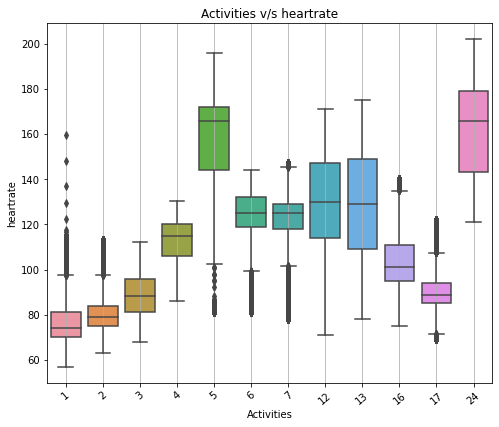

In [259]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
dat1=training_data[['activityID','heartrate']]
#dat1.activityID=dat1.activityID.astype("category")
plt.xticks(rotation=40)
sns.boxplot(x='activityID',y='heartrate',data=dat1)
plt.grid(axis='x')
plt.ylabel('heartrate')
plt.xlabel('Activities')
plt.title('Activities v/s heartrate')
plt.show()

### Bar graph for Activities v/s heartrate

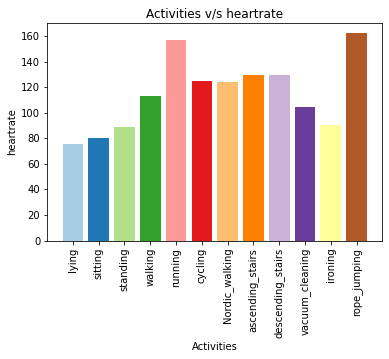

In [227]:
size = range(len(df_grouped))
plt.bar(df_grouped['activity_name'],df_grouped['heartrate'],color=plt.cm.Paired(size))
plt.xticks(rotation=90)
plt.xlabel('Activities')
plt.ylabel('heartrate')
plt.title('Activities v/s heartrate')
plt.show()

Based on our analysis, we can conclude that rope jumping produces the highest heart rate, followed by running. Lying results in the lowest heart rate.

### Analysis on activity by calorie burnt

As part of this analysis, we will consider how many calories the subjects burnt during various activities. Calorie_burnt is calculated in calorie_calc() based on the MET value and the weight of each subject. Next, a new dataframe activity_subject_group is created from training_data dataframe by grouping activityID and subjectID, then applying the mean, max, and min functions to the timestamp column for each group, and the value of calories burnt is added to that dataframe. Another dataframe <b>calorie_on_acti</b> is created by grouping the activityID and subjectID of activity_subject_group and taking their mean.  The activityID is mapped to an activityName so that a clear understanding can be gained.

In [57]:
def calorie_calc(i):
    
    T=60
    MET=MET_values[activity_subject_group['activityID'][i]]
    W=subject_weights[activity_subject_group['subject_id'][i]]
    calories= T * MET * 3.5 * W / (200 * 60)
    
    return calories

In [98]:
activity_subject_group=training_data.groupby(['activityID','subject_id'])['timestamp'].agg([np.mean,max,min])
activity_subject_group=activity_subject_group.reset_index()
activity_subject_group['calorie_burnt']=0
for i in range(len(activity_subject_group['activityID'])):
    activity_subject_group['calorie_burnt'][i]=calorie_calc(i)
    
calorie_on_acti=activity_subject_group.groupby(['activityID','subject_id']).mean()
calorie_on_acti=calorie_on_acti.reset_index()
calorie_on_acti.activityID=calorie_on_acti.activityID.apply(lambda x:activityIDdict[x])
calorie_on_acti

,activityID,subject_id,mean,max,min,calorie_burnt
0,lying,1,174.045415,309.52,37.66,1.4525
1,lying,2,171.966434,289.49,55.20,1.3650
2,lying,3,276.886762,386.54,166.14,1.6100
3,lying,4,190.067999,305.69,75.26,1.6625
4,lying,5,223.699684,341.45,104.53,1.2775
...,...,...,...,...,...,...
86,rope_jumping,2,4178.977066,4245.68,4113.08,12.2850
87,rope_jumping,5,3714.966443,3753.50,3676.20,11.4975
88,rope_jumping,6,3622.808686,3624.05,3621.50,10.8675
89,rope_jumping,8,3844.586316,3888.41,3800.36,13.7025


In [101]:
calor_df_for_graph=calorie_on_acti.groupby(['activityID']).mean()
calor_df_for_graph.reset_index(drop=False, inplace=True)
calor_df_for_graph

,activityID,subject_id,mean,max,min,calorie_burnt
0,Nordic_walking,4.714286,2885.966026,3020.291429,2751.590000,7.851250
1,ascending_stairs,4.500000,1807.821634,1999.022500,1615.946250,11.602500
2,cycling,4.714286,3124.079746,3241.817143,3006.704286,5.710000
3,descending_stairs,4.500000,1901.256871,2058.310000,1753.810000,4.350937
4,ironing,4.500000,1023.305778,1172.390000,874.068750,3.335719
5,lying,4.500000,206.958464,327.148750,86.527500,1.450312
6,rope_jumping,5.166667,3164.427640,3205.508333,3123.270000,11.943750
7,running,4.714286,3432.242946,3502.458571,3362.197143,10.706250
8,sitting,4.500000,499.172845,614.961250,383.506250,2.610562
9,standing,4.500000,736.287875,854.913750,617.530000,2.610562


### Box plot for Activitiest v/s calorie_burnt

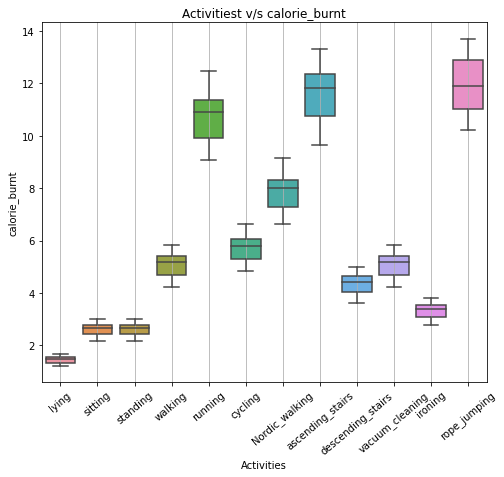

In [269]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
dat1=calorie_on_acti[['activityID','calorie_burnt']]
#dat1.activityID=dat1.activityID.astype("category")
plt.xticks(rotation=40)
sns.boxplot(x='activityID',y='calorie_burnt',data=dat1)
plt.grid(axis='x')
plt.xlabel('Activities')
plt.ylabel('calorie_burnt')

#   plt.title('Activities and Temperature of chest')
plt.title('Activitiest v/s calorie_burnt')
plt.show()

Based on our analysis, we can conclude that calorie_burnt is highest for rope jumping followed by ascending_stairs and running. Lying has the lowest value for calorie_burnt.

### Analysis on activity by heart, chest and ankle temperature

Now let's take a look at the temperature analysis of the hand, chest, and ankle.

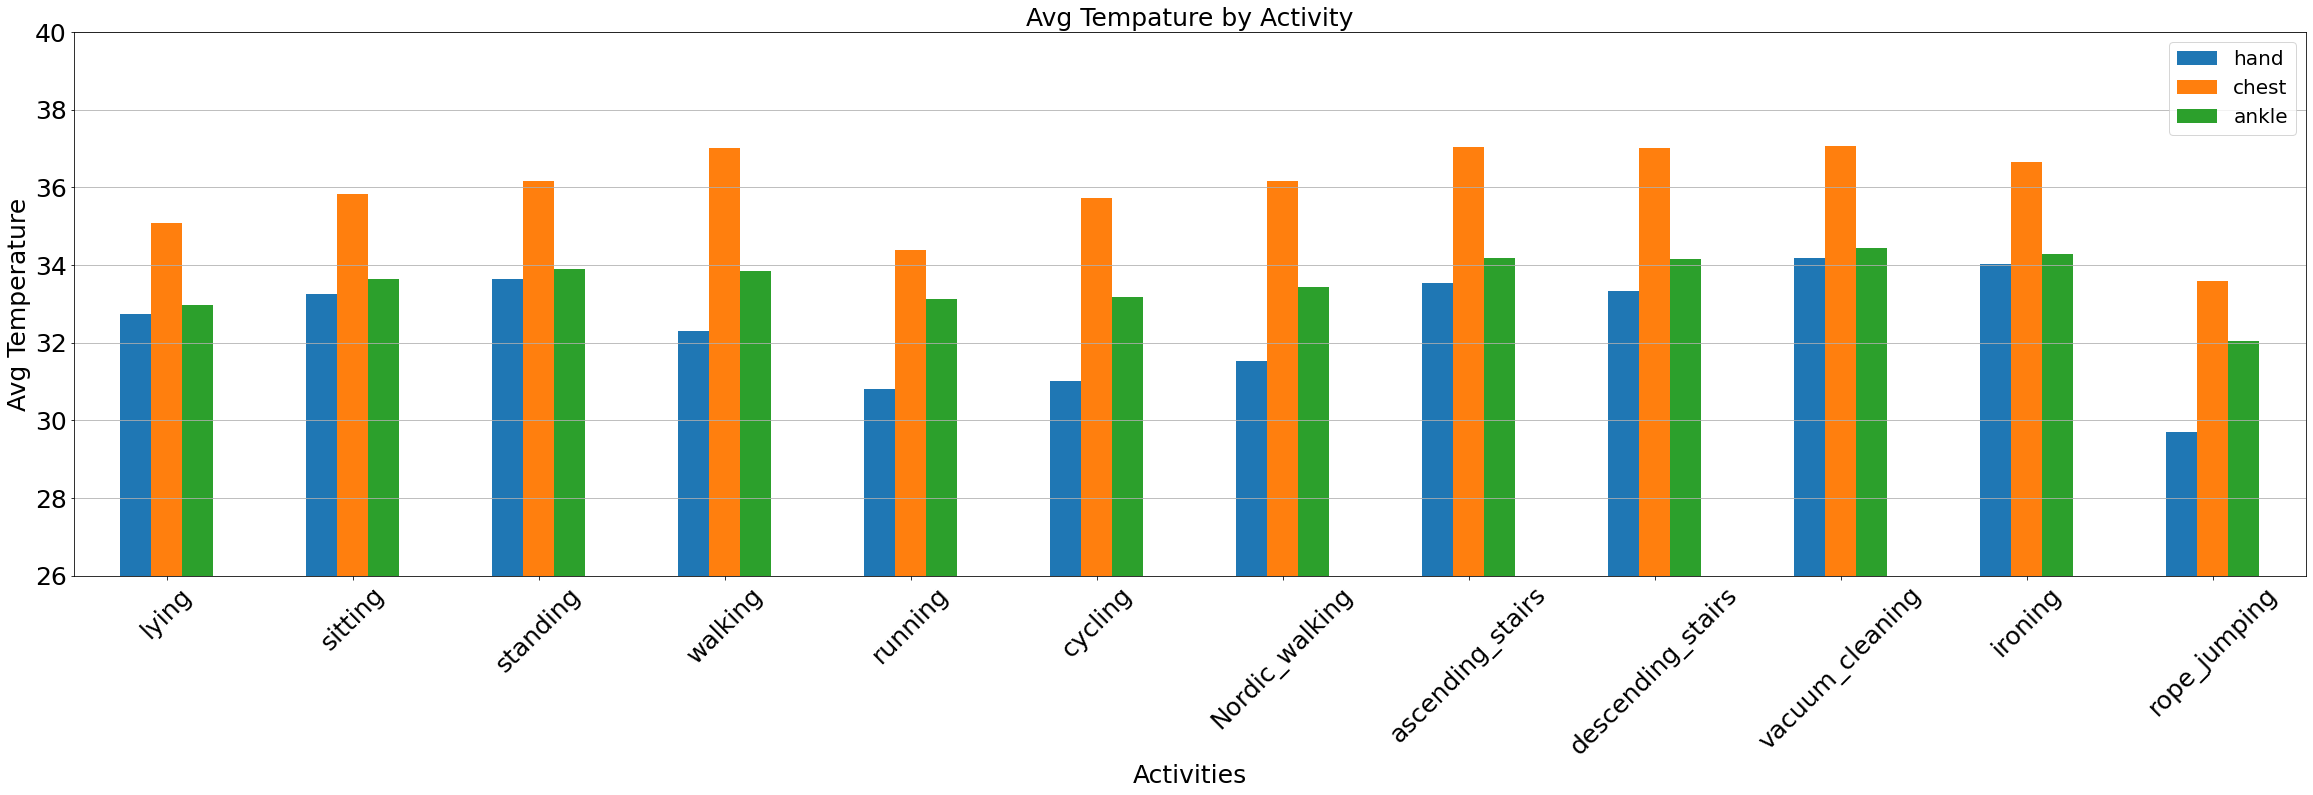

In [235]:
mean_tempreture = pd.DataFrame()
mean_tempreture['hand'] = df_grouped['Temperature_hand']
mean_tempreture['chest'] = df_grouped['Temperature_chest']
mean_tempreture['ankle'] = df_grouped['Temperature_ankle']

ax =mean_tempreture.plot(kind='bar', figsize=(40,10), title='Avg Tempatures by Activity',fontsize=25)
a = ax.set_xticklabels(df_grouped['activity_name'],rotation=45)
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))
plt.title('Avg Tempature by Activity',fontsize = 25)
plt.ylim(26, 40)
plt.xlabel('Activities',fontsize=25)
plt.ylabel('Avg Temperature', fontsize=25)
plt.grid(axis='y')

According to this graph, we can conclude that the chest temperature is the highest compared to ankle and hand temperatures. The temperatures of the chest, hand, and ankle are higher when ascending_stairs, descending_stairs, Ironing and vacuum_cleaning. rope_jumping has the lowest values.

### Correlation Analysis

Correlation analysis is a statistical technique that is used to evaluate the strength and direction of the relationship between two variables. It measures the degree to which a change in one variable is associated with a change in another variable. 

We are mapping the activity ID and activity name here. 

In [27]:
df_grouped['activity_name']=1
for i in range(len(df_grouped['activityID'])):
    df_grouped['activity_name'][i]=activityIDdict[df_grouped['activityID'][i]]
df_grouped

,activityID,timestamp,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id,activity_name
0,1,205.810018,75.545557,32.728505,3.679602,2.061675,6.367305,3.791752,2.032754,6.588179,...,-6.226228,-3.316962,0.010893,-0.005854,0.006003,-17.937375,20.577229,0.134306,4.485731,lying
1,2,506.308536,80.047179,33.258141,-1.389341,4.295544,5.173842,-1.262264,4.294076,5.383078,...,-0.216851,-2.089557,0.006796,-0.005329,0.005010,-22.525800,2.503881,21.125203,4.306876,sitting
2,3,733.377930,88.536730,33.637740,-7.075932,3.223117,2.675270,-6.939606,3.266560,2.893323,...,-0.741048,-1.643213,0.004367,-0.004551,0.004309,-22.656027,-0.594149,24.427203,4.593166,standing
3,4,2429.595921,112.779310,32.303069,-10.107593,2.515623,1.922580,-10.100182,2.545913,2.092860,...,0.632620,-2.693545,-0.005349,-0.113771,-0.000048,-36.985424,-0.592640,15.840951,4.623625,walking
4,5,3445.280586,156.609147,30.819405,-6.504239,6.728369,0.287698,-6.624070,6.352816,0.388420,...,2.880917,-3.189012,0.002644,-0.100271,-0.037299,-36.532773,-8.301071,13.229515,4.663884,running
5,6,3128.694951,124.830549,31.009282,-5.154956,2.507518,7.122948,-5.158149,2.506534,7.262646,...,2.129800,-1.068567,0.085572,0.038773,0.003845,-38.848188,-6.929358,12.873313,4.701040,cycling
6,7,2903.735748,123.775604,31.528332,-4.737611,5.079735,2.543156,-4.736760,5.078315,2.692999,...,0.872126,-2.906883,-0.004517,-0.140149,0.006245,-37.386417,-0.656277,14.345998,4.851653,Nordic_walking
7,12,1806.752318,129.518261,33.528458,-8.733582,3.658778,1.603061,-8.643621,3.695112,1.801738,...,1.604495,-2.708451,0.385221,0.133281,-0.006582,-35.736146,-4.829318,13.768898,4.402396,ascending_stairs
8,13,1905.608580,129.094747,33.323658,-6.282657,2.910228,3.656226,-6.184478,2.924561,3.853605,...,1.154140,-2.114203,-0.405388,-0.242240,0.111473,-36.826082,-4.451120,20.214430,4.166409,descending_stairs
9,16,1359.725161,104.182793,34.176997,-7.162320,3.575758,1.913401,-7.031500,3.595148,2.132941,...,0.435375,-1.281936,-0.002207,0.005179,0.004223,-24.416449,4.187497,11.367237,4.550262,vacuum_cleaning


In order to reduce the columns we have <b>axis_reducer()</b>, in which we  take the sum of the square roots for each of the three values provided. In this way, the heatmap can be easily interpreted.

In [28]:
def axis_reducer(df,a,b,c,d):
    ref=df.copy()
    ref[d]=1
    for i in range(len(ref[a])):
#         x=ref[a][i]
#         y=ref[b][i]
#         z=ref[c][i]
#           print(ref[b][i])  

        ref[d][i]=(ref[a][i]**2 + ref[b][i]**2 + ref[c][i]**2)**0.5

#         ref[d][i]=dist
    ref=ref.drop([a,b,c], axis=1)
    
    
    
    return ref

In [29]:
df_correlation=training_data.copy()
df_correlation.reset_index(drop=True, inplace=True)
df_correlation

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
0,767.77,3,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,...,9.716540,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.87960,36.806500,2
1,1926.37,12,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,...,11.137500,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.7218,33.83850,-6.571620,1
2,3749.31,24,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-4.136650,-4.006830,2.162320,1.877290,-0.176273,-0.654045,-44.6465,-12.21680,0.272571,5
3,255.84,1,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,-0.117976,-9.411680,-2.836260,-0.008012,0.002114,0.017758,-17.3221,26.44510,-4.782110,6
4,491.73,2,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,9.187270,2.903000,-2.153400,0.010209,0.011341,0.028921,-19.4371,15.82690,26.000300,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971431,3648.85,6,120.000000,29.7500,-6.10533,3.427980,7.365140,-6.577840,4.301450,9.142140,...,10.602400,-2.752050,-1.022720,0.154275,0.059888,0.106166,-41.1119,5.34881,8.881400,2
971432,498.44,2,92.000000,32.5625,-7.87425,4.095880,4.141940,-7.704180,4.138990,4.356700,...,9.135820,1.192120,-3.570340,0.063705,0.008307,0.002250,-85.4454,38.14700,16.401700,1
971433,3961.26,5,139.000000,28.8750,-5.33359,36.979800,-3.435980,-3.119450,34.862600,-2.873060,...,11.857500,5.583830,0.381641,-1.355570,1.238730,-3.278750,-51.4954,-5.78950,36.450200,2
971434,783.52,17,74.000000,33.3750,2.11020,11.319200,-2.429680,2.211510,12.367400,-2.346000,...,9.890210,-0.561093,-2.660590,0.426933,-0.741163,0.191537,-33.2568,-1.96371,46.112500,7


In [30]:
ref=axis_reducer(df_correlation,'3D_hand_Accl_16_1','3D_hand_Accl_16_2','3D_hand_Accl_16_3','Hand_Acceleration_16')
ref=axis_reducer(ref,'3D_hand_Accl_6_1','3D_hand_Accl_6_2','3D_hand_Accl_6_3','Hand_Acceleration_6')
ref=axis_reducer(ref,'3D_handGyro_1','3D_handGyro_2','3D_handGyro_3','Hand_Gyrometer')
ref=axis_reducer(ref,'3D_ankle_Accl_6_1','3D_ankle_Accl_6_2','3D_ankle_Accl_6_3','Ankle_Acceleration')
ref=axis_reducer(ref,'3D_handmagneto_1','3D_handmagneto_2','3D_handmagneto_3','Hand_magnetometer')
ref=axis_reducer(ref,'3D_ankle_Accl_16_1','3D_ankle_Accl_16_2','3D_ankle_Accl_16_3','Ankle_Acceleration_16')
ref=axis_reducer(ref,'3D_ankleGyro_1','3D_ankleGyro_2','3D_ankleGyro_3','Ankle_Gyrometer')
ref=axis_reducer(ref,'3D_anklemagneto_1','3D_anklemagneto_2','3D_anklemagneto_3','Ankle_Magnetometer')
ref=axis_reducer(ref,'3D_chest_Accl_16_1','3D_chest_Accl_16_2','3D_chest_Accl_16_3','Chest_Acceleration_16')
ref

,timestamp,activityID,heartrate,Temperature_hand,Temperature_chest,3D_chest_Accl_6_1,3D_chest_Accl_6_2,3D_chest_Accl_6_3,3D_chestGyro_1,3D_chestGyro_2,...,subject_id,Hand_Acceleration_16,Hand_Acceleration_6,Hand_Gyrometer,Ankle_Acceleration,Hand_magnetometer,Ankle_Acceleration_16,Ankle_Gyrometer,Ankle_Magnetometer,Chest_Acceleration_16
0,767.77,3,90.000000,34.1875,37.5000,0.726417,9.00292,-3.942390,-0.032422,-0.058200,...,2,9.751386,9.660047,0.164967,9.884888,34.928264,9.853628,0.110294,44.612218,10.060474
1,1926.37,12,167.909091,33.6875,36.9375,1.029990,12.11190,-4.267670,0.197389,-0.299194,...,1,11.847243,11.014777,2.181952,11.491565,48.546151,11.880628,0.738707,62.156053,13.478711
2,3749.31,24,181.000000,33.8125,36.4375,0.823781,7.44068,1.432570,2.479190,-0.082051,...,5,8.460191,5.797924,4.643583,6.151600,46.379032,7.628115,1.995762,46.288600,11.259950
3,255.84,1,62.000000,33.4375,35.5625,0.426480,-1.29363,9.676190,-0.026513,-0.017288,...,6,9.613840,10.019164,0.062214,9.830463,48.484174,10.163821,0.019596,31.972911,9.440225
4,491.73,2,79.000000,34.3125,37.6250,0.323531,9.94835,0.641904,-0.074353,0.035903,...,8,9.729352,9.696556,0.057963,9.872713,29.258687,9.926956,0.032699,36.115194,9.970973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971431,3648.85,6,120.000000,29.7500,34.7500,-2.415180,3.05996,-12.388600,0.063543,0.134901,...,2,10.162253,12.056085,0.268151,11.001392,53.481398,10.488048,0.196618,42.399025,12.667246
971432,498.44,2,92.000000,32.5625,34.1875,0.954195,9.73556,0.682817,-0.018283,0.019778,...,1,9.794678,9.770694,0.041158,9.880875,56.686076,10.033660,0.064284,95.000662,9.771799
971433,3961.26,5,139.000000,28.8750,32.2500,3.928670,22.06030,-10.543100,3.670570,0.764957,...,2,37.520111,35.119600,2.651422,13.112022,56.899400,11.042984,3.757955,63.355439,30.175062
971434,783.52,17,74.000000,33.3750,36.1250,2.309780,10.08320,-1.908610,-0.331533,1.281290,...,7,11.767777,12.780731,4.275455,10.257184,44.155289,10.479384,0.876516,56.887903,10.583624


In [96]:
ref=axis_reducer(ref,'3D_chest_Accl_6_1','3D_chest_Accl_6_2','3D_chest_Accl_6_3','Chest_Acceleration_6')
ref=axis_reducer(ref,'3D_chestGyro_1','3D_chestGyro_2','3D_chestGyro_3','Chest_Gyrometer')
ref=axis_reducer(ref,'3D_chestmagneto_1','3D_chestmagneto_2','3D_chestmagneto_3','Chest_Magnetometer')
ref

,timestamp,activityID,heartrate,Temperature_hand,Temperature_chest,Temperature_ankle,subject_id,Hand_Acceleration_16,Hand_Acceleration_6,Hand_Gyrometer,Ankle_Acceleration,Hand_magnetometer,Ankle_Acceleration_16,Ankle_Gyrometer,Ankle_Magnetometer,Chest_Acceleration_16,Chest_Acceleration_6,Chest_Gyrometer,Chest_Magnetometer
0,767.77,3,90.000000,34.1875,37.5000,34.8125,2,9.751386,9.660047,0.164967,9.884888,34.928264,9.853628,0.110294,44.612218,10.060474,9.855084,0.084096,27.869222
1,1926.37,12,167.909091,33.6875,36.9375,34.9375,1,11.847243,11.014777,2.181952,11.491565,48.546151,11.880628,0.738707,62.156053,13.478711,12.883012,0.474735,43.174891
2,3749.31,24,181.000000,33.8125,36.4375,34.1250,5,8.460191,5.797924,4.643583,6.151600,46.379032,7.628115,1.995762,46.288600,11.259950,7.621981,2.515189,49.537940
3,255.84,1,62.000000,33.4375,35.5625,34.6250,6,9.613840,10.019164,0.062214,9.830463,48.484174,10.163821,0.019596,31.972911,9.440225,9.771592,0.034585,49.229344
4,491.73,2,79.000000,34.3125,37.6250,33.9375,8,9.729352,9.696556,0.057963,9.872713,29.258687,9.926956,0.032699,36.115194,9.970973,9.974286,0.083730,26.310660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971431,3648.85,6,120.000000,29.7500,34.7500,33.6250,2,10.162253,12.056085,0.268151,11.001392,53.481398,10.488048,0.196618,42.399025,12.667246,12.987450,0.233825,41.916091
971432,498.44,2,92.000000,32.5625,34.1875,32.9375,1,9.794678,9.770694,0.041158,9.880875,56.686076,10.033660,0.064284,95.000662,9.771799,9.806011,0.033836,74.998591
971433,3961.26,5,139.000000,28.8750,32.2500,31.7500,2,37.520111,35.119600,2.651422,13.112022,56.899400,11.042984,3.757955,63.355439,30.175062,24.763849,4.356266,53.524002
971434,783.52,17,74.000000,33.3750,36.1250,32.5625,7,11.767777,12.780731,4.275455,10.257184,44.155289,10.479384,0.876516,56.887903,10.583624,10.518973,1.351819,37.290062


A <b>heatmap</b> is a visual representation of data displayed in coloured matrix form. By plotting a heatmap, we can see how much statistical similarity exists between columns. Heatmaps can be used to check whether a correlation exists between columns of a dataframe.

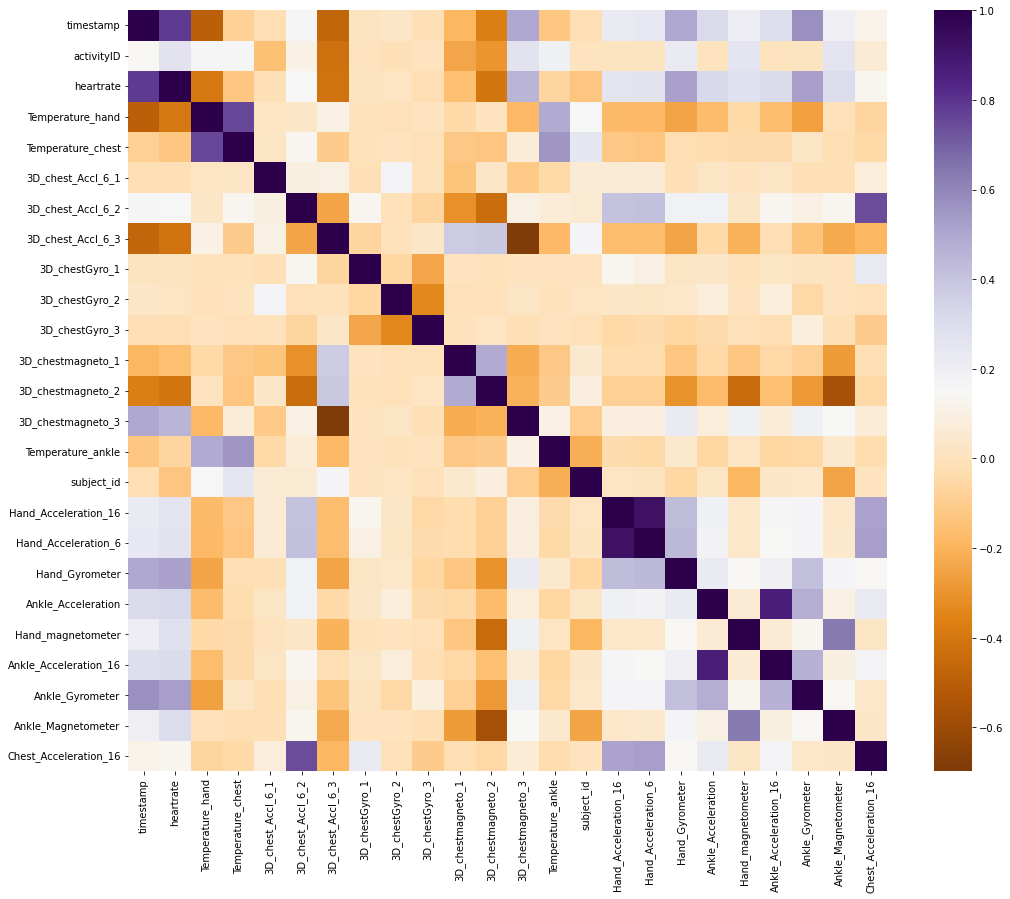

In [260]:
df_corr = ref.corr(method ='pearson')
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(17, 14))
sns.heatmap(df_corr,cmap = "PuOr", mask=np.zeros_like(df_corr, dtype=bool))
plt.show()

Based on the heatmap, we can conclude that Ankle_Gyrometer, 3D_chestmagneto_3, and Hand_Gyrometer are positively correlated since the value for pearson coefficient is higher, while 3D_chest_Accl_6_3 and Temperature_hand are negatively correlated.

# Hypothesis Testing

<b>Hypothesis</b>:
 "<b>IF</b>, the subject is performing cumbersome activities like rope jumping and running<br> 
 <b>THEN</b> average heartrate of the subject will be more than 100."
    
  - Independent Variable : Running and rope jumping (Physical activity)
  - Dependent Variable : Average Heart rate 

 <b>Null Hypothesis(H0) : The average heartrate of the subject while performing running and rope jumping is less than or equal to 100 (μ <= 100).</b><br>
 
 <b>Alternate Hypothesis(H1) :The average heartrate of the subject while performing running and rope jumping is greater than 100
 (μ > 100).</b>

In [105]:
running_data = training_data[training_data["activityID"] == 5]
ropejumping_data = training_data[training_data["activityID"] == 24]
cumbersome_data=pd.DataFrame()
cumbersome_data = pd.concat([cumbersome_data,running_data,ropejumping_data], ignore_index=False)
cumbersome_data

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
1436799,3466.15,5,176.0,28.0625,-11.614500,12.199200,-5.178400,-18.146800,21.783800,-6.030400,...,24.685000,12.452400,-0.480484,-0.516671,-0.102250,-1.742000,-41.216200,3.27400,28.63310,6
1165461,3392.82,5,152.0,33.8125,-4.625630,-4.954130,0.564829,-4.227810,-5.102200,0.416994,...,11.119500,-5.265060,-2.954690,-0.163015,-0.412381,-3.518760,-19.752800,-35.30170,14.99560,5
1427969,3377.85,5,167.0,28.1875,-32.151100,54.792300,-3.820800,-43.525800,62.126600,-3.238780,...,19.176400,13.552100,-3.073160,-0.252656,0.118389,-2.155950,-44.974600,5.13008,26.91570,6
233529,3313.29,5,173.0,30.4375,-30.378100,53.540200,6.178220,-35.598200,45.132200,4.914560,...,11.916575,-2.005432,-2.950493,-0.130902,0.464649,-1.483988,-45.024525,-50.20960,13.76705,1
1422642,3324.58,5,145.0,28.3125,8.240610,5.953630,1.182600,6.741310,6.221660,1.256810,...,7.763660,0.499046,-1.139180,3.702880,-2.506820,7.659240,-44.596100,2.52040,21.53050,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247533,3602.14,24,181.0,30.1875,-1.027870,7.147790,-4.925800,-1.094920,6.650410,-4.489510,...,2.476990,-2.874380,-0.615926,1.523360,0.133100,2.189300,-51.879500,-34.34670,36.14870,1
511742,4230.05,24,179.0,28.5000,0.634975,-0.968486,1.130520,1.424530,-2.712040,-0.137652,...,7.196820,1.316780,-0.230692,-0.532160,-0.233961,-1.513260,-38.235700,-1.37933,34.65590,2
1184329,3681.75,24,139.0,33.8750,-9.025420,3.777730,1.508630,-8.812540,3.887880,1.821460,...,9.242210,0.678307,-3.236270,-0.143172,-0.223484,-0.306898,-46.121900,19.94060,9.16550,5
501024,4122.87,24,123.0,28.3125,-0.539344,-1.067640,-10.933300,-0.241368,0.023247,-11.120200,...,5.258980,5.559860,6.713020,-0.230153,0.232471,2.192700,-36.096500,-12.53920,30.18710,2


In [106]:
cumbersome_mean=cumbersome_data['heartrate'].mean()
cumbersome_std=cumbersome_data['heartrate'].std()
cumbersome_count=cumbersome_data['heartrate'].count()
cumbersome_std

22.60876807693868

In [107]:
cumbersome_count

73482

In [270]:
z=(cumbersome_mean-100)/(cumbersome_std/np.sqrt(cumbersome_count))
p_value_from_normal=(1-stats.norm.cdf(z))
print('Mean from data: ',cumbersome_mean)
print ('one tail p value from normal: ', format(p_value_from_normal, '.2f'))
#print ('one tail p value from normal: ', z)

Mean from data:  158.40277581348565
one tail p value from normal:  0.00


In my analysis, I will take 5% significance levels into account. Due to the p_value of 0.05 from the z-test, I will reject my null hypothesis, which is that the subject's heart rate is less than 100 while performing cumbersome activities. I will accept my alternate hypothesis that states the average heart rate of the subject when performing rope jumping and running is greater than 100. 

# Modelling

By using modeling, I will be able to predict the values. My main focus will be on predicting heart rate and activity ID. In order to predict the heart rate based on the IMU readings of the chest, I will use Polynomial Regression.

In [236]:
phydata.corr()

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
timestamp,1.000000,0.143712,0.781720,-0.493674,-0.321940,0.039321,-0.215706,-0.332616,0.036865,-0.226055,...,0.343229,0.218812,0.003066,0.001594,-0.045435,-0.001125,-0.308442,-0.234251,-0.041953,-0.022949
activityID,0.143712,1.000000,0.265348,0.159352,-0.129905,0.038609,-0.116724,-0.129179,0.042104,-0.118394,...,0.144746,0.103893,0.099199,-0.004876,0.012900,0.001905,-0.199631,-0.069626,0.209897,-0.001891
heartrate,0.781720,0.265348,1.000000,-0.395932,-0.298458,0.065728,-0.268278,-0.307739,0.063252,-0.277938,...,0.297939,0.211036,-0.009076,0.001228,-0.028440,0.001550,-0.325755,-0.247339,-0.056973,-0.127993
Temperature_hand,-0.493674,0.159352,-0.395932,1.000000,0.059130,-0.053288,0.077812,0.073200,-0.048332,0.094127,...,-0.061476,-0.053106,-0.042125,-0.000417,0.033085,0.001882,0.092230,0.112293,0.154059,0.154094
3D_hand_Accl_16_1,-0.321940,-0.129905,-0.298458,0.059130,1.000000,-0.085483,0.257433,0.978695,-0.080322,0.261275,...,-0.320398,-0.101164,-0.013885,0.038499,-0.072116,0.093352,0.084533,0.206595,-0.042602,-0.030536
3D_hand_Accl_16_2,0.039321,0.038609,0.065728,-0.053288,-0.085483,1.000000,-0.067639,-0.070139,0.945219,-0.070711,...,0.060863,0.127373,0.007775,-0.004623,-0.031042,-0.037152,-0.049024,-0.096015,0.041010,-0.281382
3D_hand_Accl_16_3,-0.215706,-0.116724,-0.268278,0.077812,0.257433,-0.067639,1.000000,0.254849,-0.067663,0.964548,...,-0.164375,-0.075457,0.023768,0.012820,-0.011710,0.023692,0.060863,0.108253,-0.011762,-0.002032
3D_hand_Accl_6_1,-0.332616,-0.129179,-0.307739,0.073200,0.978695,-0.070139,0.254849,1.000000,-0.075857,0.258160,...,-0.314685,-0.100935,-0.013800,0.039194,-0.070733,0.082080,0.085498,0.211722,-0.039436,-0.028407
3D_hand_Accl_6_2,0.036865,0.042104,0.063252,-0.048332,-0.080322,0.945219,-0.067663,-0.075857,1.000000,-0.057245,...,0.057046,0.130811,0.009622,-0.002519,-0.032122,-0.013802,-0.052534,-0.099627,0.043655,-0.299075
3D_hand_Accl_6_3,-0.226055,-0.118394,-0.277938,0.094127,0.261275,-0.070711,0.964548,0.258160,-0.057245,1.000000,...,-0.170112,-0.075637,0.021927,0.012257,-0.011419,0.025473,0.062323,0.112929,-0.009647,0.003984


### Polynomial Regression

Polynomial regression models the relationship between a dependent and independent variable as an nth-degree polynomial. Data points that do not fit linear regression is analyzed using polynomial regression. <br>We calculated the correlation between the columns of the dataframe in the above section. As a result of the dataframe observed above, we can conclude that heartrate has a higher correlation with 3D_chest_Accl_16_2, 3D_chestmagneto_3 respectively. Hence, X will be an independent variable which includes both 3D_chest_Accl_16_2 and 3D_chestmagneto_3, and tar will be the list of variables that includes heartrate as a dependent variable.
  
- Independent Variable : X :- Includes 3D_chest_Accl_16_2,3D_chestmagneto_3 
- Dependent Variable.  : tar :-Includes heartrate

The Process involves:
  - Transform the independent variable X by calculating till nth degree polynomial where n=8
  - Obtain train test data by applying train_test_split inbuilt function to both X and tar.
  - Apply poly_reg_model.fit(X_train,y_train) for fitting the data.
  - Hence the corresponding model is created.
        
We compute the root mean squared error and the mean squared error in order to obtain the error. I have also provided an example for the same considering two values of X from the dataframe and predicted the heart rate.

In [265]:
X=phydata[['3D_chest_Accl_16_2','3D_chestmagneto_3']]
#phytarget=phydata['heartrate']
tar = phydata['heartrate']

In [266]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, tar, test_size=0.4,train_size=0.6,random_state=4798)

In [267]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [268]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print('The root mean squared error is {}'.format(poly_reg_rmse))
poly_mse=mean_squared_error(y_test, poly_reg_y_predicted)
print('The mean squared error is {}'.format(poly_mse))
poly_feat = poly.fit_transform([[1.930140,-54.463000]])
predict_heart= poly_reg_model.predict(poly_feat)
predict_heart

The root mean squared error is 21.549188895804267
The mean squared error is 464.3675420670539


array([93.95065891])

### Random Forest Algorithm

The Random Forest algorithm can be used for both classification and regression, making it extremely versatile. As the name implies, Random Forest is a forest of trees, decision trees that are randomly populated. The algorithms create and combine decision trees, and the more trees in the forest, the better the accuracy of the predictions.
The process includes:-
- A dataframe data created by dropping activityID and timestamp and target which includes activityID
- Train test data split is done for both data and target
- Import RandomForestClassifier and create a gaussian classifier clf and train the model
- Obtain the root mean sqaured error
- Accuracy of the model is also obtained

In [246]:
data=phydata.drop(['activityID','timestamp'], axis=1)
target = phydata['activityID']
train_data,test_data,train_target,test_target = cross_validation.train_test_split(data,target,test_size=0.4,train_size=0.6,random_state=12345)

In [247]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_data,train_target)

y_pred=clf.predict(test_data)

In [249]:
rand_rmse = np.sqrt(mean_squared_error(test_target, y_pred))
print('The root mean squared error for Random Forest Classifier is {}'.format(rand_rmse))

The root mean squared error for Random Forest Classifier is 0.12492301228595215


In [250]:
from sklearn import metrics
# Model Accuracy shows how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_target, y_pred))

Accuracy: 0.9998250013832611


In [251]:
tes=phydata[phydata['subject_id']==3]
tes

,timestamp,activityID,heartrate,Temperature_hand,3D_hand_Accl_16_1,3D_hand_Accl_16_2,3D_hand_Accl_16_3,3D_hand_Accl_6_1,3D_hand_Accl_6_2,3D_hand_Accl_6_3,...,3D_ankle_Accl_6_1,3D_ankle_Accl_6_2,3D_ankle_Accl_6_3,3D_ankleGyro_1,3D_ankleGyro_2,3D_ankleGyro_3,3D_anklemagneto_1,3D_anklemagneto_2,3D_anklemagneto_3,subject_id
513306,166.11,1,142.600000,31.0000,-1.43105,5.40588,7.774870,-1.25869,5.42474,7.86577,...,9.70353,0.999148,-0.697040,-0.201402,-0.059007,0.107266,-43.6954,1.163090,57.3792,3
513307,166.12,1,134.000000,31.0000,-1.57471,5.14382,8.043010,-1.42397,5.42599,7.92634,...,9.68799,0.953621,-0.817893,-0.240913,-0.067527,0.091327,-42.7963,0.696723,56.8717,3
513308,166.13,1,125.400000,31.0000,-1.88156,4.50119,8.040590,-1.62143,5.06513,8.10854,...,9.71766,0.968642,-0.908910,-0.372723,-0.060329,0.094986,-42.8046,1.573020,57.3762,3
513309,166.14,1,116.800000,31.0000,-1.84377,4.50090,8.041150,-1.62562,4.58187,8.09451,...,9.73190,1.074280,-1.106080,-0.345057,-0.102539,0.114357,-42.9115,0.921397,56.8751,3
513310,166.15,1,108.200000,31.0000,-1.78781,5.18687,8.424550,-1.73035,4.59780,8.17008,...,9.73166,1.134700,-1.166820,-0.435516,-0.078463,0.089137,-42.7882,0.467699,57.4881,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687639,2443.15,4,122.000000,28.6875,-1.20135,9.90925,-1.781750,-1.26926,10.12770,-1.79391,...,9.89845,1.029330,-0.788984,-0.157561,0.077097,0.775084,-22.6451,-6.823270,12.4377,3
687640,2443.16,4,122.000000,28.6875,-1.23218,9.94916,-1.589910,-1.30068,9.88640,-1.70274,...,9.77915,1.044690,-0.576507,-0.100678,0.100662,0.740007,-22.8618,-6.935700,13.1809,3
687641,2443.17,4,122.000000,28.6875,-1.34154,9.95104,-1.476090,-1.28472,9.91656,-1.62732,...,9.95965,0.954051,-0.516633,-0.064701,0.054579,0.731004,-22.5340,-6.825550,12.3130,3
687642,2443.18,4,122.000000,28.6875,-1.02451,9.95240,-1.047990,-1.28208,9.97719,-1.37075,...,10.00460,0.863293,-0.531715,-0.063496,0.039095,0.730862,-22.6406,-6.938610,12.8077,3


In [252]:
tes=phydata.iloc[[62117]]
tes1=tes.drop(['activityID','timestamp'], axis=1)
pred=clf.predict(tes1)
pred

array([3], dtype=int64)

# Summary

As a result of this report, software and hardware are designed that can quantify physical activity and provide insights based on the data. In order to achieve this, we went through several phases, including data cleaning, exploratory data analysis, hypothesis testing, and modelling. Since the data provided didn't have linear correlation, we used polynomial regression and a random forest algorithm for modeling.

As a result of this analysis, we were able to analyze each variable and derive a conclusion based on it. My analysis included heartrate, calorie burnt, a heatmap showing the correlation between the variables, and a comparison of the chest, ankle, and hand temperatures. In this analysis, we gained a greater understanding of the variables and how they relate to one another.

Other algorithms such as KNN and K-Mean can also be considered for modeling, which will also yield the desired results. The models we used are polynomial regression and the random forest algorithm which has an accuracy greater than 90% that will accurately predict the models. In conclusion, all report requirements have been met.

